## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
Dropout_EXP = [0.15, 0.25, 0.35]
NUM_NEURONS = [[512, 256, 128], [512, 256, 128, 64], [512, 256, 128, 64, 32]]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for num_neurons in NUM_NEURONS:
    for drop in Dropout_EXP:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with {} layer and Dropout_Rate = {}".format(len(num_neurons), drop))
        model = build_mlp(input_shape=x_train.shape[1:], num_neurons=num_neurons, drp_ratio=drop)
        model.summary()
        optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "exp-{}-layer-dorpout-{}".format(len(num_neurons), drop)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}


W0804 11:50:07.471999  1312 deprecation_wrapper.py:119] From C:\Users\Hui\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0804 11:50:07.473000  1312 deprecation_wrapper.py:119] From C:\Users\Hui\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0804 11:50:07.495000  1312 deprecation_wrapper.py:119] From C:\Users\Hui\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0804 11:50:07.496999  1312 deprecation_wrapper.py:119] From C:\Users\Hui\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0804 11:50:07.500999  1312 deprecat

Experiment with 3 layer and Dropout_Rate = 0.15
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)         

W0804 11:50:07.727999  1312 deprecation.py:323] From C:\Users\Hui\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 9s 171us/step - loss: 1.9925 - acc: 0.2679 - val_loss: 1.8100 - val_acc: 0.3414
Epoch 2/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.7936 - acc: 0.3542 - val_loss: 1.6936 - val_acc: 0.4087
Epoch 3/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.7315 - acc: 0.3804 - val_loss: 1.6519 - val_acc: 0.4153
Epoch 4/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.6894 - acc: 0.3947 - val_loss: 1.6309 - val_acc: 0.4266
Epoch 5/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.6565 - acc: 0.4063 - val_loss: 1.5658 - val_acc: 0.4353
Epoch 6/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.6266 - acc: 0.4148 - val_loss: 1.5422 - val_acc: 0.4492
Epoch 7/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.5973 - acc: 0.4236 - val_loss: 1.5283 - 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 166us/step - loss: 2.0802 - acc: 0.2299 - val_loss: 1.8573 - val_acc: 0.3221
Epoch 2/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.8937 - acc: 0.3097 - val_loss: 1.7663 - val_acc: 0.3628
Epoch 3/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.8360 - acc: 0.3336 - val_loss: 1.7196 - val_acc: 0.3874
Epoch 4/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.7996 - acc: 0.3468 - val_loss: 1.7291 - val_acc: 0.3915
Epoch 5/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.7648 - acc: 0.3594 - val_loss: 1.6471 - val_acc: 0.4156
Epoch 6/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.7291 - acc: 0.3768 - val_loss: 1.6432 - val_acc: 0.4234
Epoch 7/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.7102 - acc: 0.3817 - val_loss: 1.6133 - 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 161us/step - loss: 2.1211 - acc: 0.2038 - val_loss: 1.9170 - val_acc: 0.3006
Epoch 2/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.9650 - acc: 0.2687 - val_loss: 1.8528 - val_acc: 0.3191
Epoch 3/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.9165 - acc: 0.2892 - val_loss: 1.8407 - val_acc: 0.3410
Epoch 4/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.8914 - acc: 0.2935 - val_loss: 1.8137 - val_acc: 0.3563
Epoch 5/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.8758 - acc: 0.3043 - val_loss: 1.7859 - val_acc: 0.3738
Epoch 6/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.8613 - acc: 0.3137 - val_loss: 1.8111 - val_acc: 0.3594
Epoch 7/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.8510 - acc: 0.3198 - val_loss: 1.8198 - 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 165us/step - loss: 2.0682 - acc: 0.2336 - val_loss: 1.8758 - val_acc: 0.3170
Epoch 2/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.8621 - acc: 0.3257 - val_loss: 1.7320 - val_acc: 0.3746
Epoch 3/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.7925 - acc: 0.3541 - val_loss: 1.7012 - val_acc: 0.3943
Epoch 4/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.7436 - acc: 0.3736 - val_loss: 1.6447 - val_acc: 0.4085
Epoch 5/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.7122 - acc: 0.3876 - val_loss: 1.6254 - val_acc: 0.4213
Epoch 6/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.6771 - acc: 0.3992 - val_loss: 1.5868 - val_acc: 0.4328
Epoch 7/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.6595 - acc: 0.4067 - val_loss: 1.5527 - 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 165us/step - loss: 2.1333 - acc: 0.1972 - val_loss: 1.9280 - val_acc: 0.2981
Epoch 2/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.9483 - acc: 0.2805 - val_loss: 1.8476 - val_acc: 0.3257
Epoch 3/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.8846 - acc: 0.3093 - val_loss: 1.7717 - val_acc: 0.3529
Epoch 4/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.8560 - acc: 0.3215 - val_loss: 1.7574 - val_acc: 0.3705
Epoch 5/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.8263 - acc: 0.3323 - val_loss: 1.7333 - val_acc: 0.3909
Epoch 6/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.8023 - acc: 0.3426 - val_loss: 1.6845 - val_acc: 0.4035
Epoch 7/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.7804 - acc: 0.3513 - val_loss: 1.6871 - 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 166us/step - loss: 2.1905 - acc: 0.1656 - val_loss: 2.0378 - val_acc: 0.2336
Epoch 2/50
50000/50000 [==============================] - 8s 157us/step - loss: 2.0475 - acc: 0.2190 - val_loss: 1.9723 - val_acc: 0.2618
Epoch 3/50
50000/50000 [==============================] - 8s 157us/step - loss: 2.0048 - acc: 0.2351 - val_loss: 1.9357 - val_acc: 0.2955
Epoch 4/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.9736 - acc: 0.2516 - val_loss: 1.9224 - val_acc: 0.2787
Epoch 5/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.9555 - acc: 0.2568 - val_loss: 1.8922 - val_acc: 0.3112
Epoch 6/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.9456 - acc: 0.2627 - val_loss: 1.9186 - val_acc: 0.2867
Epoch 7/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.9292 - acc: 0.2723 - val_loss: 1.8922 - 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 168us/step - loss: 2.1336 - acc: 0.1871 - val_loss: 1.9585 - val_acc: 0.2777
Epoch 2/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.9408 - acc: 0.2874 - val_loss: 1.8110 - val_acc: 0.3496
Epoch 3/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.8594 - acc: 0.3233 - val_loss: 1.7538 - val_acc: 0.3607
Epoch 4/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.8108 - acc: 0.3444 - val_loss: 1.6954 - val_acc: 0.3927
Epoch 5/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.7657 - acc: 0.3646 - val_loss: 1.6801 - val_acc: 0.4025
Epoch 6/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.7404 - acc: 0.3770 - val_loss: 1.6344 - val_acc: 0.4144
Epoch 7/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.7102 - acc: 0.3872 - val_loss: 1.5910 - 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 167us/step - loss: 2.1984 - acc: 0.1589 - val_loss: 1.9889 - val_acc: 0.2658
Epoch 2/50
50000/50000 [==============================] - 8s 159us/step - loss: 2.0188 - acc: 0.2423 - val_loss: 1.9120 - val_acc: 0.3035
Epoch 3/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.9554 - acc: 0.2703 - val_loss: 1.8476 - val_acc: 0.3419
Epoch 4/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.9246 - acc: 0.2918 - val_loss: 1.8528 - val_acc: 0.3318
Epoch 5/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.8940 - acc: 0.3058 - val_loss: 1.7834 - val_acc: 0.3539
Epoch 6/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.8711 - acc: 0.3139 - val_loss: 1.7687 - val_acc: 0.3696
Epoch 7/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.8518 - acc: 0.3223 - val_loss: 1.7471 - 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 167us/step - loss: 2.2935 - acc: 0.1228 - val_loss: 2.1253 - val_acc: 0.1842
Epoch 2/50
50000/50000 [==============================] - 8s 159us/step - loss: 2.1345 - acc: 0.1817 - val_loss: 2.0400 - val_acc: 0.2340
Epoch 3/50
50000/50000 [==============================] - 8s 158us/step - loss: 2.0797 - acc: 0.2015 - val_loss: 2.0190 - val_acc: 0.2441
Epoch 4/50
50000/50000 [==============================] - 8s 158us/step - loss: 2.0430 - acc: 0.2139 - val_loss: 1.9806 - val_acc: 0.2462
Epoch 5/50
50000/50000 [==============================] - 8s 158us/step - loss: 2.0225 - acc: 0.2205 - val_loss: 1.9862 - val_acc: 0.2511
Epoch 6/50
50000/50000 [==============================] - 8s 157us/step - loss: 2.0210 - acc: 0.2208 - val_loss: 1.9398 - val_acc: 0.2603
Epoch 7/50
50000/50000 [==============================] - 8s 157us/step - loss: 2.0069 - acc: 0.2299 - val_loss: 1.9709 - 

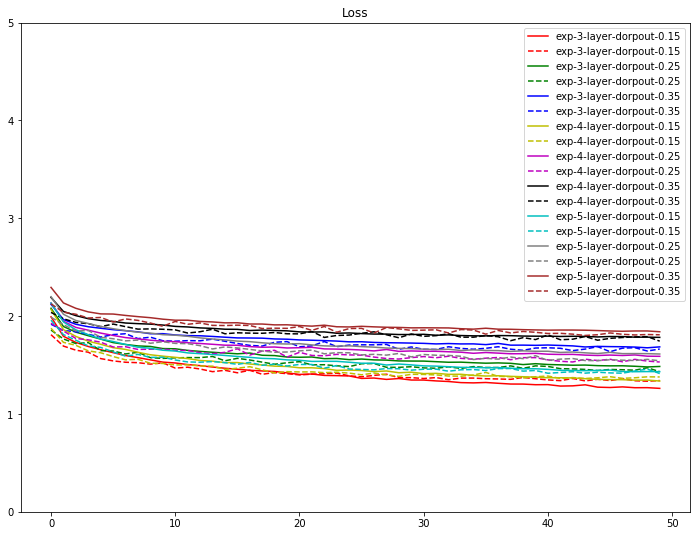

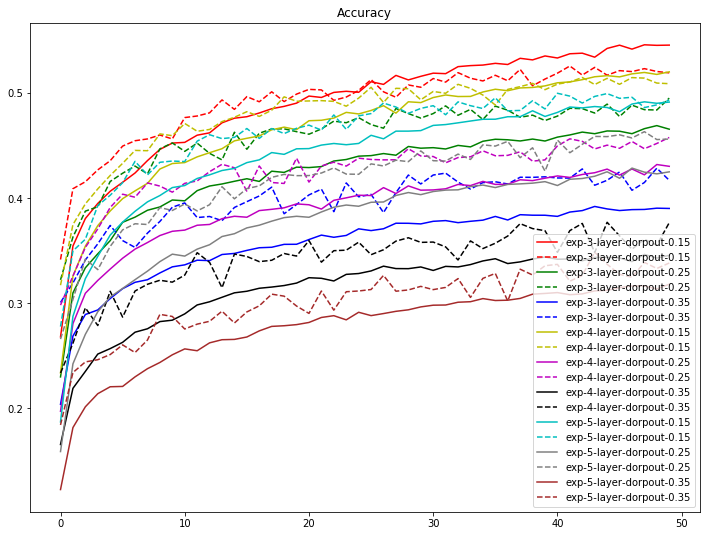

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k", "c", "gray", "brown"]

plt.figure(figsize=(12,9))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(12,9))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()